# ALP Project
### Fill missing value & handling imbalanced data

In [1]:
#input dataset
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/mjohantito/DataMining_APLProject/main/Dataset_Terapi_Kelenjar_Getah_Bening.csv")
df

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.00,1.0,1.0,65,7.0,1
86,2,51,6.00,6.0,NaN,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.00,1.0,2.0,30,25.0,1


# EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 87 non-null     float64
 3   Number_of_Warts      89 non-null     float64
 4   Type                 85 non-null     float64
 5   Area                 90 non-null     int64  
 6   induration_diameter  88 non-null     float64
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


In [3]:
df.describe()

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
count,90.000000,90.000000,87.000000,89.000000,85.000000,90.000000,88.000000,90.000000
mean,1.544444,31.044444,7.221264,6.123596,1.752941,95.700000,14.500000,0.788889
std,0.500811,12.235435,3.151325,4.231431,0.829599,136.614643,17.378147,0.410383
min,1.000000,15.000000,1.000000,1.000000,1.000000,6.000000,2.000000,0.000000
25%,1.000000,20.250000,5.000000,2.000000,1.000000,35.500000,5.000000,1.000000
50%,2.000000,28.500000,7.750000,6.000000,2.000000,53.000000,7.000000,1.000000
75%,2.000000,41.750000,10.000000,9.000000,2.000000,80.750000,9.000000,1.000000
max,2.000000,56.000000,12.000000,19.000000,3.000000,900.000000,70.000000,1.000000


In [4]:
df.isnull().sum()

gender                 0
age                    0
Time                   3
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

<AxesSubplot:>

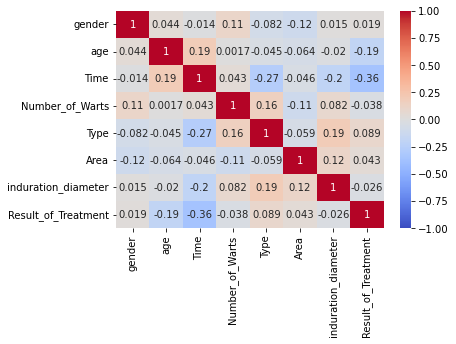

In [5]:
import seaborn as sns

sns.heatmap(df.corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True)

# Create Model

### Classification untuk fill Type
#### Menggunakan SVC (Support Vector Classification)

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy import stats

In [7]:
#create traintest set by dropping null value di column yang akan digunakan
df1 = df.dropna(axis=0, subset=['Type','Number_of_Warts','induration_diameter','Time'])
df1 = df1.loc[:,['Type','Number_of_Warts','induration_diameter','Time']]
df1

,Type,Number_of_Warts,induration_diameter,Time
0,1.0,6.0,25.0,11.00
2,1.0,9.0,50.0,12.00
3,2.0,7.0,7.0,1.75
4,3.0,7.0,7.0,5.00
5,1.0,14.0,6.0,12.00
...,...,...,...,...
83,1.0,7.0,25.0,10.25
84,2.0,4.0,9.0,9.00
85,1.0,1.0,7.0,4.00
87,1.0,5.0,7.0,2.25


In [8]:
df1.isnull().sum()

Type                   0
Number_of_Warts        0
induration_diameter    0
Time                   0
dtype: int64

In [9]:
X = df1[['Number_of_Warts','induration_diameter','Time']]
y = df1['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [10]:
y_pred = svm_clf.predict(X_test)
comparison_table = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
comparison_table

,y_test,y_pred
56,1.0,1.0
31,3.0,3.0
34,1.0,1.0
71,2.0,1.0
51,1.0,1.0
78,3.0,3.0
83,1.0,1.0
85,1.0,1.0
55,1.0,1.0
64,1.0,1.0


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[9 0 0]
 [1 0 0]
 [0 0 2]]
Accuracy Score:  0.9166666666666666


### Regression untuk fill Time
#### Menggunakan SVR (Support Vector Regression)

<Figure size 720x576 with 0 Axes>

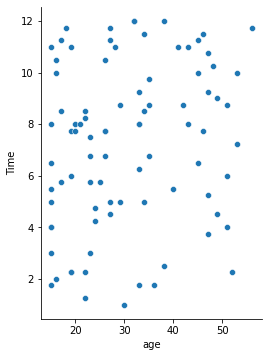

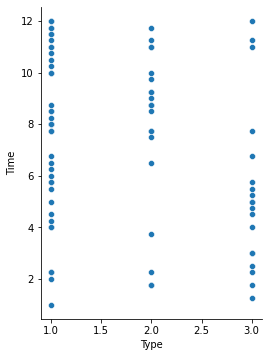

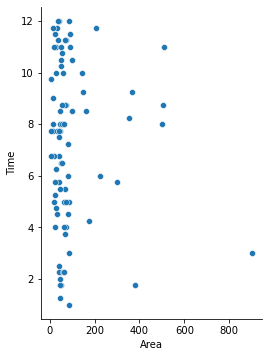

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['age'], y_vars=['Time'], height=5, aspect=0.75)
sns.pairplot(data=df, x_vars=['Type'], y_vars=['Time'], height=5, aspect=0.75)
sns.pairplot(data=df, x_vars=['Area'], y_vars=['Time'], height=5, aspect=0.75)

plt.show()

In [13]:
df2 = df.dropna(axis=0, subset=['Time','age','Type','Area'])
df2 = df2.loc[:,['Time','age','Type','Area']]
df2

,Time,age,Type,Area
0,11.00,15,1.0,30
1,11.75,27,1.0,208
2,12.00,32,1.0,43
3,1.75,33,2.0,379
4,5.00,34,3.0,64
...,...,...,...,...
83,10.25,48,1.0,50
84,9.00,49,2.0,14
85,4.00,51,1.0,65
87,2.25,52,1.0,63


In [14]:
from sklearn.linear_model import LinearRegression

X = df2[['age','Type','Area']]
y = df2['Time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1) #random_state

from sklearn.svm import SVR
import numpy as np

svr = SVR().fit(X, y)

In [15]:
pd.options.display.float_format = '{:0.2f}'.format
y_pred = svr.predict(X_test)
compare = pd.DataFrame({'Prediction' : y_pred, 'Actual' : y_test})

compare

,Prediction,Actual
11,7.95,11.00
76,8.65,8.00
51,7.61,5.50
58,7.72,11.25
42,7.88,8.75
70,7.65,6.75
63,7.64,7.75
88,7.89,10.00
83,7.91,10.25
48,7.91,10.00


In [16]:
def MAPE(y_test,y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
    return mape

LR_MAPE= MAPE(y_test, y_pred)
print("MAPE: ",LR_MAPE)
print('Model Score: ', svr.score(np.array(X_test), y_test))

MAPE:  16.302878218736183
Model Score:  -0.26126530403636705


/Users/manueljohantito/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


# Fill Null

In [17]:
df.isnull().sum()

gender                 0
age                    0
Time                   3
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

In [18]:
df[df['Time'].isna()]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
43,1,38,NaN,8.00,2.00,56,45.00,1
50,1,54,NaN,13.00,3.00,43,5.00,1
72,2,28,NaN,4.00,1.00,9,2.00,1


In [19]:
df[df['Type'].isna()]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
10,2,26,10.50,6.00,NaN,50,9.00,0
26,1,20,8.00,6.00,NaN,45,8.00,1
66,2,23,6.75,6.00,NaN,19,2.00,1
86,2,51,6.00,6.00,NaN,80,2.00,1
89,2,53,7.25,6.00,NaN,81,7.00,1


In [20]:
df[df['Number_of_Warts'].isna()]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
1,1,27,11.75,NaN,1.00,208,6.00,0


In [21]:
df[df['induration_diameter'].isna()]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
19,1,15,4.00,4.00,3.00,25,NaN,1
53,2,15,6.50,19.00,1.00,56,NaN,1


In [22]:
df_typemiss = df['Type'].isna()
var_typemiss = pd.DataFrame(df[['Number_of_Warts','induration_diameter','Time']][df_typemiss])
type_pred = svm_clf.predict(var_typemiss)
missingval = df['Type'].isna()
df.loc[missingval,'Type'] = type_pred

In [23]:
df_timemiss = df['Time'].isna()
var_timemiss = pd.DataFrame(df[['age','Type','Area']][df_timemiss])
time_pred = svr.predict(var_timemiss)
missingval = df['Time'].isna()
df.loc[missingval,'Time'] = time_pred

In [24]:
df['Number_of_Warts'] = df['Number_of_Warts'].fillna(df['Number_of_Warts'].mode()[0])

In [25]:
df['induration_diameter'] = df['induration_diameter'].fillna(np.floor(df['induration_diameter'].mean()))

In [26]:
df.isnull().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

In [27]:
df.iloc[[10,26,66,86,89]]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
10,2,26,10.50,6.00,1.00,50,9.00,0
26,1,20,8.00,6.00,1.00,45,8.00,1
66,2,23,6.75,6.00,1.00,19,2.00,1
86,2,51,6.00,6.00,1.00,80,2.00,1
89,2,53,7.25,6.00,1.00,81,7.00,1


In [28]:
df.iloc[[43,50,72]]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
43,1,38,7.84,8.00,2.00,56,45.00,1
50,1,54,7.93,13.00,3.00,43,5.00,1
72,2,28,7.67,4.00,1.00,9,2.00,1


In [29]:
df.iloc[[1]]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
1,1,27,11.75,2.00,1.00,208,6.00,0


In [30]:
df.iloc[[19,53]]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
19,1,15,4.00,4.00,3.00,25,14.00,1
53,2,15,6.50,19.00,1.00,56,14.00,1


# Handling Imbalance Data

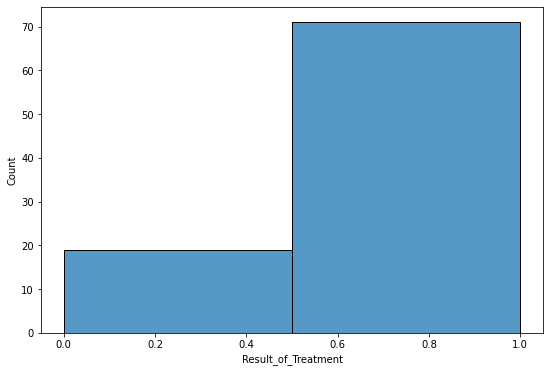

In [31]:
#Check Imbalanced Data
fig = plt.subplots(figsize=(9,6))
sns.histplot(data=df['Result_of_Treatment'],bins=2)
plt.show()

In [32]:
x = df.drop(['Result_of_Treatment'],axis=1)
y = df['Result_of_Treatment']

In [33]:
#dealing imbalanced data by over_sampling
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=30)
x_sampling,y_sampling = sm.fit_resample(x,y)

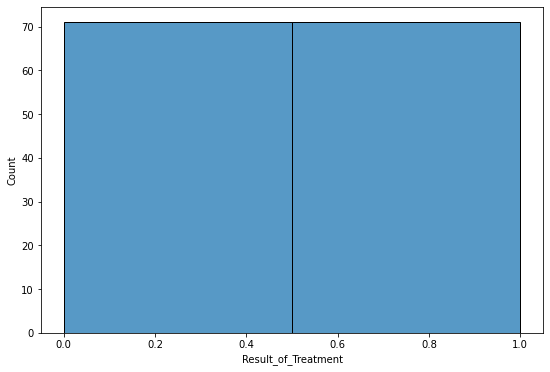

In [34]:
#After over_sampling check
fig = plt.subplots(figsize=(9,6))
sns.histplot(data=y_sampling, bins=2)
plt.show()